In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sportsipy.ncaab import boxscore
from sportsipy.ncaab.teams import Teams
from sportsipy.ncaab.teams import Team

df = pd.read_csv('./2018-2019_pregamestatsfinal.csv')

In [2]:
df.head()

,boxscore,date,location,losing_abbr,losing_name,winning_abbr,winning_name,team_name,conf,winner,...,home_team_name,away_team_name,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage
0,2018-11-15-21-texas-christian,"November 15, 2018","Ed & Rae Schollmaier Arena, Fort Worth, Texas",FRESNO-STATE,Fresno State,TEXAS-CHRISTIAN,TCU,TCU,mwc,Home,...,TCU,Fresno State,0.573770,0.453333,0.400000,1.000000,0.532710,0.571429,0.421488,1.000000
1,2018-11-23-14-fresno-state,"November 23, 2018","Titan Gym, Fullerton, California",FRESNO-STATE,Fresno State,MIAMI-FL,Miami (FL),Miami (FL),mwc,Away,...,Miami (FL),Fresno State,0.533333,0.474747,0.462644,0.666667,0.546000,0.527273,0.427386,1.000000
2,2018-12-29-19-fresno-state,"December 29, 2018","Save Mart Center, Fresno, California",FRESNO-STATE,Fresno State,UTAH-VALLEY,Utah Valley,Utah Valley,mwc,Away,...,Utah Valley,Fresno State,0.557927,0.518621,0.459565,0.818182,0.557072,0.526846,0.502378,0.714286
3,2019-01-12-20-fresno-state,"January 12, 2019","Save Mart Center, Fresno, California",FRESNO-STATE,Fresno State,NEVADA,Nevada,Nevada,mwc,Away,...,Nevada,Fresno State,0.553047,0.516495,0.465171,0.800000,0.531746,0.519409,0.463843,0.937500
4,2019-02-23-20-nevada,"February 23, 2019","Lawlor Events Center, Reno, Nevada",FRESNO-STATE,Fresno State,NEVADA,Nevada,Nevada,mwc,Home,...,Nevada,Fresno State,0.541306,0.515098,0.473576,0.730769,0.539457,0.524355,0.464958,0.923077


In [3]:
# We have a population of just 1 season. We need to create a holdout sample to test with
test_df = df.sample(frac = 0.15)

train_df = pd.concat([test_df,df]).drop_duplicates(keep=False)

print(len(df), ' ', len(test_df), ' ', len(train_df))

train_df.head()


5603   840   4763


,boxscore,date,location,losing_abbr,losing_name,winning_abbr,winning_name,team_name,conf,winner,...,home_team_name,away_team_name,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage
0,2018-11-15-21-texas-christian,"November 15, 2018","Ed & Rae Schollmaier Arena, Fort Worth, Texas",FRESNO-STATE,Fresno State,TEXAS-CHRISTIAN,TCU,TCU,mwc,Home,...,TCU,Fresno State,0.573770,0.453333,0.400000,1.000000,0.532710,0.571429,0.421488,1.000000
1,2018-11-23-14-fresno-state,"November 23, 2018","Titan Gym, Fullerton, California",FRESNO-STATE,Fresno State,MIAMI-FL,Miami (FL),Miami (FL),mwc,Away,...,Miami (FL),Fresno State,0.533333,0.474747,0.462644,0.666667,0.546000,0.527273,0.427386,1.000000
2,2018-12-29-19-fresno-state,"December 29, 2018","Save Mart Center, Fresno, California",FRESNO-STATE,Fresno State,UTAH-VALLEY,Utah Valley,Utah Valley,mwc,Away,...,Utah Valley,Fresno State,0.557927,0.518621,0.459565,0.818182,0.557072,0.526846,0.502378,0.714286
3,2019-01-12-20-fresno-state,"January 12, 2019","Save Mart Center, Fresno, California",FRESNO-STATE,Fresno State,NEVADA,Nevada,Nevada,mwc,Away,...,Nevada,Fresno State,0.553047,0.516495,0.465171,0.800000,0.531746,0.519409,0.463843,0.937500
4,2019-02-23-20-nevada,"February 23, 2019","Lawlor Events Center, Reno, Nevada",FRESNO-STATE,Fresno State,NEVADA,Nevada,Nevada,mwc,Home,...,Nevada,Fresno State,0.541306,0.515098,0.473576,0.730769,0.539457,0.524355,0.464958,0.923077


In [4]:
# Dropping irrelevant columns
train_df.drop(columns=['conf', 'home_team_name', 'away_team_name', 'team_name', 'winning_abbr', 'winning_name', 'losing_name', 'losing_abbr', 'location', 'home_team', 'away_team'], inplace=True)
test_df.drop(columns=['conf', 'home_team_name', 'away_team_name', 'team_name', 'winning_abbr', 'winning_name', 'losing_name', 'losing_abbr', 'location', 'home_team', 'away_team'], inplace=True)

test_df.head()

,boxscore,date,winner,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage
2474,2019-03-05-19-george-mason,"March 5, 2019",Away,0.508242,0.508251,0.506031,0.551724,0.506458,0.519535,0.432686,0.793103
3912,2019-03-02-22-oregon,"March 2, 2019",Home,0.494438,0.500000,0.506313,0.586207,0.514959,0.517710,0.483333,0.571429
4776,2018-12-12-21-brigham-young,"December 12, 2018",Home,0.472881,0.604938,0.488010,0.625000,0.528329,0.518193,0.471369,0.636364
3441,2019-01-14-19-pittsburgh,"January 14, 2019",Home,0.516196,0.555215,0.489217,0.812500,0.514738,0.503617,0.441506,0.687500
754,2019-02-16-12-wake-forest,"February 16, 2019",Away,0.453927,0.523938,0.525920,0.391304,0.535379,0.570749,0.494249,0.791667


In [5]:
test_df.isnull().sum()

boxscore                            0
date                                0
winner                              0
away_pregame_eFG                   21
away_pregame_rebound_percentage    21
away_pregame_eFG_allowed           21
away_pregame_win_percentage        21
home_pregame_eFG                   24
home_pregame_rebound_percentage    24
home_pregame_eFG_allowed           24
home_pregame_win_percentage        24
dtype: int64

<AxesSubplot:xlabel='winner', ylabel='count'>

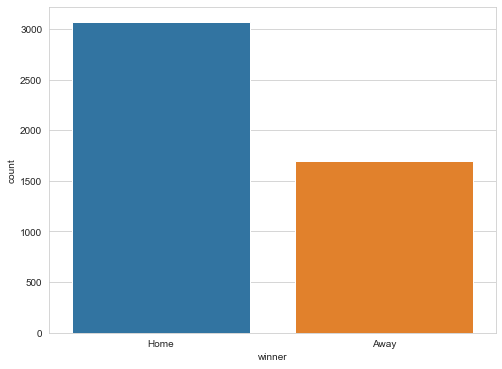

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.countplot(x='winner', data= train_df)

In [7]:
#train_df['away_pregame_eFG'].plot(kind='box', figsize= (10,8))

# Create bool masks where home team won - we will use this to get 1 and 0 for the results
winnermask1 = (test_df['winner'] == 'Home')
winnermask2 = (train_df['winner'] == 'Home')


In [8]:
# Setting a new column equal to the bool mask of winner = Home
train_df['Home_Win'] = (train_df['winner'] == 'Home')
test_df['Home_Win'] = (test_df['winner'] == 'Home')

In [9]:
test_df.head()

,boxscore,date,winner,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,Home_Win
2474,2019-03-05-19-george-mason,"March 5, 2019",Away,0.508242,0.508251,0.506031,0.551724,0.506458,0.519535,0.432686,0.793103,False
3912,2019-03-02-22-oregon,"March 2, 2019",Home,0.494438,0.500000,0.506313,0.586207,0.514959,0.517710,0.483333,0.571429,True
4776,2018-12-12-21-brigham-young,"December 12, 2018",Home,0.472881,0.604938,0.488010,0.625000,0.528329,0.518193,0.471369,0.636364,True
3441,2019-01-14-19-pittsburgh,"January 14, 2019",Home,0.516196,0.555215,0.489217,0.812500,0.514738,0.503617,0.441506,0.687500,True
754,2019-02-16-12-wake-forest,"February 16, 2019",Away,0.453927,0.523938,0.525920,0.391304,0.535379,0.570749,0.494249,0.791667,False


In [10]:

#Turning the True/False into 1/0
train_df["Home_Win"] = train_df["Home_Win"].astype(int)
test_df["Home_Win"] = test_df["Home_Win"].astype(int)



In [12]:
test_df.head()

,boxscore,date,winner,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,Home_Win
2474,2019-03-05-19-george-mason,"March 5, 2019",Away,0.508242,0.508251,0.506031,0.551724,0.506458,0.519535,0.432686,0.793103,0
3912,2019-03-02-22-oregon,"March 2, 2019",Home,0.494438,0.500000,0.506313,0.586207,0.514959,0.517710,0.483333,0.571429,1
4776,2018-12-12-21-brigham-young,"December 12, 2018",Home,0.472881,0.604938,0.488010,0.625000,0.528329,0.518193,0.471369,0.636364,1
3441,2019-01-14-19-pittsburgh,"January 14, 2019",Home,0.516196,0.555215,0.489217,0.812500,0.514738,0.503617,0.441506,0.687500,1
754,2019-02-16-12-wake-forest,"February 16, 2019",Away,0.453927,0.523938,0.525920,0.391304,0.535379,0.570749,0.494249,0.791667,0


In [13]:
# Creating a column that has the month the game took place in. Not sure whether this is 100% a good idea
train_df.reset_index(inplace=True)

for i in range(0,5000):
    datestring = train_df.at[i, 'date']
    if 'Novemb' in datestring:
        train_df.at[i, 'month'] = 'November'
    elif 'Dece' in datestring:
        train_df.at[i, 'month'] = 'December'
    elif 'Janu' in datestring:
        train_df.at[i, 'month'] = 'January'
    elif 'Febr' in datestring:
        train_df.at[i, 'month'] = 'February'
    elif 'Mar' in datestring:
        train_df.at[i, 'month'] = 'March'
    elif 'Apr' in datestring:
        train_df.at[i, 'month'] = 'April'
    else:
        print('error')

KeyError: 4763

In [14]:
# Do the same for the testing data
test_df.reset_index(inplace=True)

for i in range(0,5000):
    datestring = test_df.at[i, 'date']
    if 'Novemb' in datestring:
        test_df.at[i, 'month'] = 'November'
    elif 'Dece' in datestring:
        test_df.at[i, 'month'] = 'December'
    elif 'Janu' in datestring:
        test_df.at[i, 'month'] = 'January'
    elif 'Febr' in datestring:
        test_df.at[i, 'month'] = 'February'
    elif 'Mar' in datestring:
        test_df.at[i, 'month'] = 'March'
    elif 'Apr' in datestring:
        test_df.at[i, 'month'] = 'April'
    else:
        print('error')


KeyError: 840

In [15]:
# Drop irrelevant columns - might run into errors here
test_df.head()
train_df.drop(columns=['index', 'boxscore', 'date', 'winner'], inplace=True)
test_df.drop(columns=['index', 'boxscore', 'date', 'winner'], inplace=True)


In [17]:
train_df.head()

,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,Home_Win,month
0,0.573770,0.453333,0.400000,1.000000,0.532710,0.571429,0.421488,1.000000,1,November
1,0.533333,0.474747,0.462644,0.666667,0.546000,0.527273,0.427386,1.000000,0,November
2,0.557927,0.518621,0.459565,0.818182,0.557072,0.526846,0.502378,0.714286,0,December
3,0.553047,0.516495,0.465171,0.800000,0.531746,0.519409,0.463843,0.937500,0,January
4,0.541306,0.515098,0.473576,0.730769,0.539457,0.524355,0.464958,0.923077,1,February


In [18]:
# Get dummies for the month
train_df= pd.get_dummies(train_df, columns=['month'], drop_first= True)
test_df= pd.get_dummies(test_df, columns=['month'], drop_first= True)

In [19]:
# Filling null values with the median. Not sure if this is the best approach yet, vs. just dropping the nulls. It's 3% of the games
train_df['away_pregame_rebound_percentage'].fillna(train_df['away_pregame_rebound_percentage'].median(), inplace=True)
train_df['away_pregame_eFG_allowed'].fillna(train_df['away_pregame_eFG_allowed'].median(), inplace=True)
train_df['away_pregame_eFG'].fillna(train_df['away_pregame_eFG'].median(), inplace=True)
train_df['away_pregame_win_percentage'].fillna(train_df['away_pregame_win_percentage'].median(), inplace=True)

train_df['home_pregame_rebound_percentage'].fillna(train_df['home_pregame_rebound_percentage'].median(), inplace=True)
train_df['home_pregame_eFG_allowed'].fillna(train_df['home_pregame_eFG_allowed'].median(), inplace=True)
train_df['home_pregame_eFG'].fillna(train_df['home_pregame_eFG'].median(), inplace=True)
train_df['home_pregame_win_percentage'].fillna(train_df['home_pregame_win_percentage'].median(), inplace=True)

In [20]:
# Repeat for test data
test_df['away_pregame_rebound_percentage'].fillna(test_df['away_pregame_rebound_percentage'].median(), inplace=True)
test_df['away_pregame_eFG_allowed'].fillna(test_df['away_pregame_eFG_allowed'].median(), inplace=True)
test_df['away_pregame_eFG'].fillna(test_df['away_pregame_eFG'].median(), inplace=True)
test_df['away_pregame_win_percentage'].fillna(test_df['away_pregame_win_percentage'].median(), inplace=True)

test_df['home_pregame_rebound_percentage'].fillna(test_df['home_pregame_rebound_percentage'].median(), inplace=True)
test_df['home_pregame_eFG_allowed'].fillna(test_df['home_pregame_eFG_allowed'].median(), inplace=True)
test_df['home_pregame_eFG'].fillna(test_df['home_pregame_eFG'].median(), inplace=True)
test_df['home_pregame_win_percentage'].fillna(test_df['home_pregame_win_percentage'].median(), inplace=True)

In [22]:
train_df.isnull().sum()

away_pregame_eFG                   0
away_pregame_rebound_percentage    0
away_pregame_eFG_allowed           0
away_pregame_win_percentage        0
home_pregame_eFG                   0
home_pregame_rebound_percentage    0
home_pregame_eFG_allowed           0
home_pregame_win_percentage        0
Home_Win                           0
month_December                     0
month_February                     0
month_January                      0
month_March                        0
month_November                     0
dtype: int64

In [23]:
# shift column 'Name' to first position
first_column = test_df.pop('Home_Win')
  
# insert column using insert(position,column_name,
# first_column) function
test_df.insert(0, 'Home_Win', first_column)
test_df.head()

,Home_Win,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,month_December,month_February,month_January,month_March,month_November
0,0,0.508242,0.508251,0.506031,0.551724,0.506458,0.519535,0.432686,0.793103,0,0,0,1,0
1,1,0.494438,0.500000,0.506313,0.586207,0.514959,0.517710,0.483333,0.571429,0,0,0,1,0
2,1,0.472881,0.604938,0.488010,0.625000,0.528329,0.518193,0.471369,0.636364,1,0,0,0,0
3,1,0.516196,0.555215,0.489217,0.812500,0.514738,0.503617,0.441506,0.687500,0,0,1,0,0
4,0,0.453927,0.523938,0.525920,0.391304,0.535379,0.570749,0.494249,0.791667,0,1,0,0,0


In [24]:
# shift column 'Name' to first position
first_column = train_df.pop('Home_Win')
  
# insert column using insert(position,column_name,
# first_column) function
train_df.insert(0, 'Home_Win', first_column)
train_df.head()

,Home_Win,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,month_December,month_February,month_January,month_March,month_November
0,1,0.573770,0.453333,0.400000,1.000000,0.532710,0.571429,0.421488,1.000000,0,0,0,0,1
1,0,0.533333,0.474747,0.462644,0.666667,0.546000,0.527273,0.427386,1.000000,0,0,0,0,1
2,0,0.557927,0.518621,0.459565,0.818182,0.557072,0.526846,0.502378,0.714286,1,0,0,0,0
3,0,0.553047,0.516495,0.465171,0.800000,0.531746,0.519409,0.463843,0.937500,0,0,1,0,0
4,1,0.541306,0.515098,0.473576,0.730769,0.539457,0.524355,0.464958,0.923077,0,1,0,0,0


In [25]:
# Create separate dataframes for the features and target variable so we can train the model
x_train = train_df.iloc[:,1:]
y_train = train_df['Home_Win'].values.reshape(-1,1)

#This will be used to test our performance
x_test = test_df.iloc[:,1:]
y_test = test_df['Home_Win'].values.reshape(-1,1)


In [28]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
features= ['away_pregame_eFG', 'away_pregame_rebound_percentage', 'away_pregame_eFG_allowed', 'away_pregame_win_percentage','home_pregame_eFG', 'home_pregame_rebound_percentage', 'home_pregame_eFG_allowed', 'home_pregame_win_percentage']

# Apply transformations to the features we need to normalize on a (-1, 1) scale. Makes the model faster
x_train[features]= ss.fit_transform(x_train[features])
x_test[features]= ss.fit_transform(x_test[features])

In [29]:
x_test.head()

,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,month_December,month_February,month_January,month_March,month_November
0,-0.013679,0.070008,0.159700,0.195813,-0.387427,0.076593,-1.505024,0.842784,0,0,0,1,0
1,-0.346973,-0.141238,0.167372,0.350663,-0.154435,0.026957,-0.163799,-0.206999,0,0,0,1,0
2,-0.867457,2.545492,-0.330948,0.524871,0.212000,0.040106,-0.480644,0.100513,1,0,0,0,0
3,0.178388,1.272422,-0.298082,1.366872,-0.160482,-0.356164,-1.271473,0.342679,0,0,1,0,0
4,-1.325100,0.471645,0.701185,-0.524581,0.405228,1.468857,0.125267,0.835980,0,1,0,0,0


In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# clf is our model object
clf.fit(x_train, y_train.ravel())

LogisticRegression()

In [31]:
print(clf.score(x_train, y_train))

0.6437119462523619


In [32]:
# Get predictions on the test data using our model
predictions = clf.predict(x_test)
win_probability = clf.predict_proba(x_test)

In [33]:
# output predictions to a DF
predictionsdf = pd.DataFrame({'Win_Home': test_df['Home_Win'], 'Prediction': predictions })
predictionsdf.head()


,Win_Home,Prediction
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1


In [34]:
# Create dataframe based on forecasted probability of each game 
win_probability_df = pd.DataFrame(win_probability, columns=['Home_Loss', 'Home_Win'])
win_probability_df= win_probability_df.merge(predictionsdf, left_index=True, right_index=True, how='outer')
win_probability_df.head()
# Create histogram to show distribution
#win_probability_df['Home_Win'].hist(bins=20)

,Home_Loss,Home_Win,Win_Home,Prediction
0,0.333491,0.666509,0,1
1,0.353716,0.646284,1,1
2,0.328835,0.671165,1,1
3,0.377957,0.622043,1,1
4,0.397074,0.602926,0,1


In [37]:
len(win_probability_df)

840

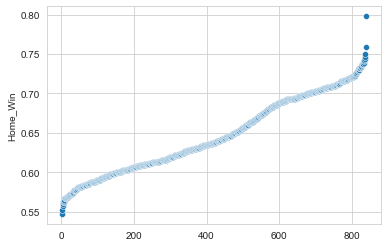

In [40]:
win_probability_df.sort_values('Home_Win', inplace=True)

plot = sns.scatterplot(data=win_probability_df, x=range(1,841), y='Home_Win')

plt.show()

In [41]:
# Getting the accuracy for the games that we forecast extra high and low likelihood
topbucket = win_probability_df[win_probability_df['Home_Win'] > 0.7]
topbucket.head()

bottombucket = win_probability_df[win_probability_df['Home_Win'] < 0.6]
bottombucket.head()

,Home_Loss,Home_Win,Win_Home,Prediction
176,0.452694,0.547306,1,1
728,0.447161,0.552839,0,1
292,0.442648,0.557352,1,1
538,0.439513,0.560487,1,1
158,0.438145,0.561855,1,1


In [42]:
from sklearn.metrics import accuracy_score
# Get the accuracy score for our overall predictions, the top and bottom buckets
overallaccuracy = accuracy_score(predictionsdf['Win_Home'], predictionsdf['Prediction'])
topbucketaccuracy = accuracy_score(topbucket['Win_Home'], topbucket['Prediction'])
bottombucketaccuracy = accuracy_score(bottombucket['Win_Home'], bottombucket['Prediction'])
print('Overall Accuracy: ', overallaccuracy, '      Accuracy p>.70: ', topbucketaccuracy, '     Accuracy p<.60: ',  bottombucketaccuracy)

Overall Accuracy:  0.6392857142857142       Accuracy p>.70:  0.7329192546583851      Accuracy p<.60:  0.609271523178808


In [43]:
# Getting confidence ratings for our predictions. >=1 is very confident
confidence = clf.decision_function(x_test)
confidencedf = pd.DataFrame(confidence, columns=['Confidence_Score'])

In [44]:
confidencedf.head(30)

,Confidence_Score
0,0.692438
1,0.602745
2,0.713458
3,0.498227
4,0.417671
5,0.324121
6,0.581216
7,0.450547
8,0.933052
9,0.423529


In [46]:
#  functions for accuracy based on high and low confidence projections
highconfidencedf = confidencedf[confidencedf['Confidence_Score'] >1]

highconfidencedf = highconfidencedf.merge(predictionsdf, left_index=True, right_index=True, how='outer')
highconfidencedf.dropna(axis=0, how='any', inplace=True)


highconfidenceaccuracy = accuracy_score(highconfidencedf['Win_Home'], highconfidencedf['Prediction'])
print(highconfidenceaccuracy)

0.75


In [ ]:
len(highconfidencedf)